# Frecuencia de Palabras

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Clase para encontrar palabras comunes en los abstracts
class MostCommonWords:
    def __init__(self, df):
        self.df = df
    
    def find_most_common_words(self, n=1000):
        # Obtener los abstracts como una lista de strings
        abstracts = self.df['Abstract'].tolist()
        
        # Inicializar CountVectorizer
        vectorizer = CountVectorizer()
        
        # Ajustar y transformar los abstracts
        X = vectorizer.fit_transform(abstracts)
        
        # Obtener el vocabulario del CountVectorizer
        vocabulary = vectorizer.get_feature_names_out()
        
        # Obtener las frecuencias de las palabras
        word_frequencies = zip(vocabulary, X.sum(axis=0).tolist()[0])
        
        # Ordenar las palabras por frecuencia
        sorted_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
        
        # Obtener las palabras más comunes
        most_common_words = sorted_words[:n]
        
        return most_common_words

In [3]:
# Cargar el DataFrame df_definitivo desde el archivo CSV
df_definitivo = pd.read_csv('CorporateFinance_def.csv') ###########################################

# Crear una instancia de la clase MostCommonWords
most_common_analyzer = MostCommonWords(df_definitivo)

In [4]:
# Encontrar las palabras más comunes
most_common_words = most_common_analyzer.find_most_common_words(n=1000)
print("Las 1000 palabras más comunes son:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('CorporateFinance_pals_coms.csv', index=False) ##############################

Las 1000 palabras más comunes son:
the: 91076
of: 57896
and: 52020
to: 31965
in: 30817
that: 13780
is: 13303
on: 13272
for: 12379
corporate: 12305
this: 12066
finance: 10205
as: 9136
financial: 8480
by: 8359
with: 8115
are: 7636
from: 5799
we: 5205
an: 5126
study: 4606
it: 4546
firms: 4515
be: 4378
have: 4274
research: 4167
has: 4151
their: 3901
which: 3577
capital: 3489
governance: 3482
management: 3424
paper: 3376
business: 3246
between: 3236
more: 3190
market: 3176
companies: 3149
or: 2981
risk: 2937
can: 2872
investment: 2803
firm: 2796
also: 2771
analysis: 2755
not: 2753
social: 2752
performance: 2750
these: 2747
value: 2678
data: 2672
development: 2554
all: 2490
economic: 2477
its: 2473
based: 2443
results: 2418
model: 2354
at: 2317
new: 2184
such: 2168
impact: 2164
how: 2151
tax: 2151
using: 2016
information: 2011
financing: 2007
findings: 1988
policy: 1973
was: 1965
green: 1964
been: 1923
our: 1799
debt: 1768
through: 1756
other: 1752
but: 1722
literature: 1721
will: 1666
effec

In [5]:
# Cargar el archivo CSV con las palabras comunes
archivo_palabras_comunes = 'CorporateFinance_pals_coms.csv' ##############################################
df_palabras_comunes = pd.read_csv(archivo_palabras_comunes)

# Obtener las 60 primeras palabras más comunes y sus frecuencias
palabras_mas_comunes = df_palabras_comunes['Palabra'].head(60)
frecuencias = df_palabras_comunes['Frecuencia'].head(60)

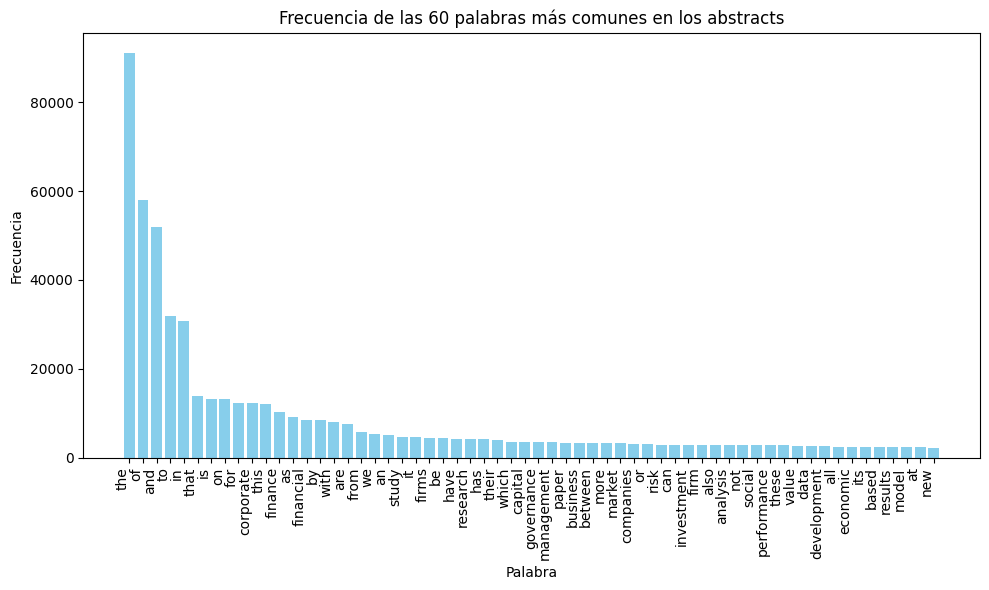

In [6]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_mas_comunes, frecuencias, color='skyblue')

# Añadir título y etiquetas
plt.title('Frecuencia de las 60 palabras más comunes en los abstracts')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()